In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
df = pd.read_csv("dataset_05.csv", sep=';')



In [3]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      100 non-null    float64
 1   x2      100 non-null    float64
 2   x3      100 non-null    float64
 3   y       100 non-null    float64
dtypes: float64(4)
memory usage: 3.3 KB
None
               x1          x2          x3           y
count  100.000000  100.000000  100.000000  100.000000
mean     0.250979    0.659987    0.297306    0.522702
std      0.084779    0.234381    0.137326    0.234364
min      0.023759    0.242460    0.021861    0.106622
25%      0.196376    0.446317    0.185219    0.322658
50%      0.256448    0.645250    0.286218    0.529904
75%      0.296589    0.880623    0.413916    0.737615
max      0.559200    1.036477    0.636643    0.899036


In [4]:
print(df.isnull().sum())


x1    0
x2    0
x3    0
y     0
dtype: int64


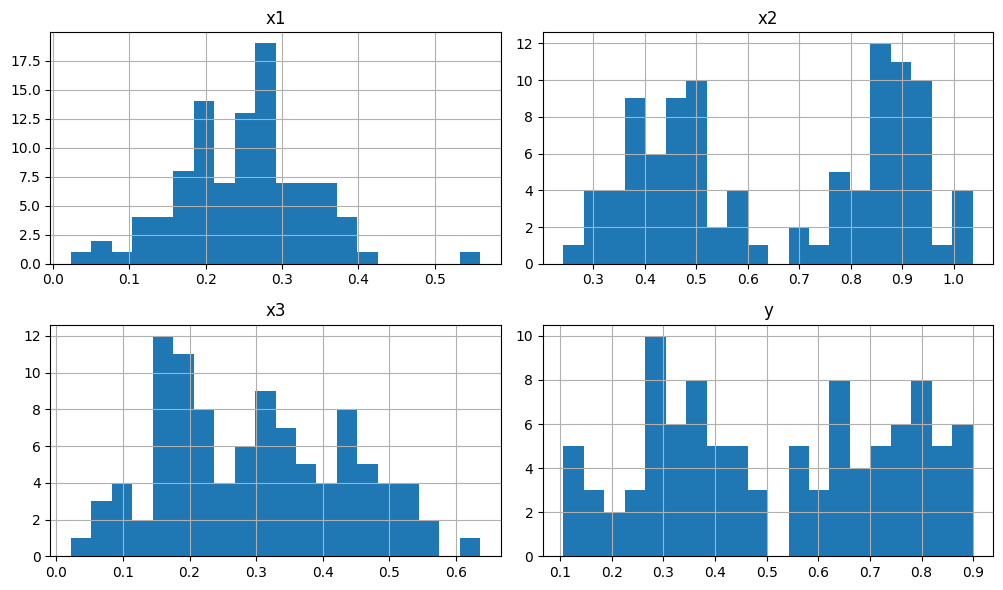

In [5]:
import matplotlib.pyplot as plt

df.hist(figsize=(10, 6), bins=20)
plt.tight_layout()
plt.show()



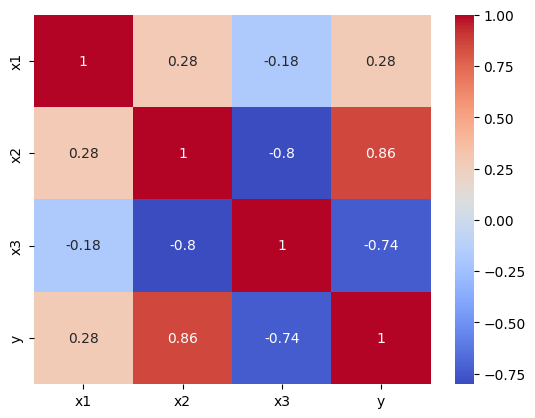

In [6]:
import seaborn as sns

sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()


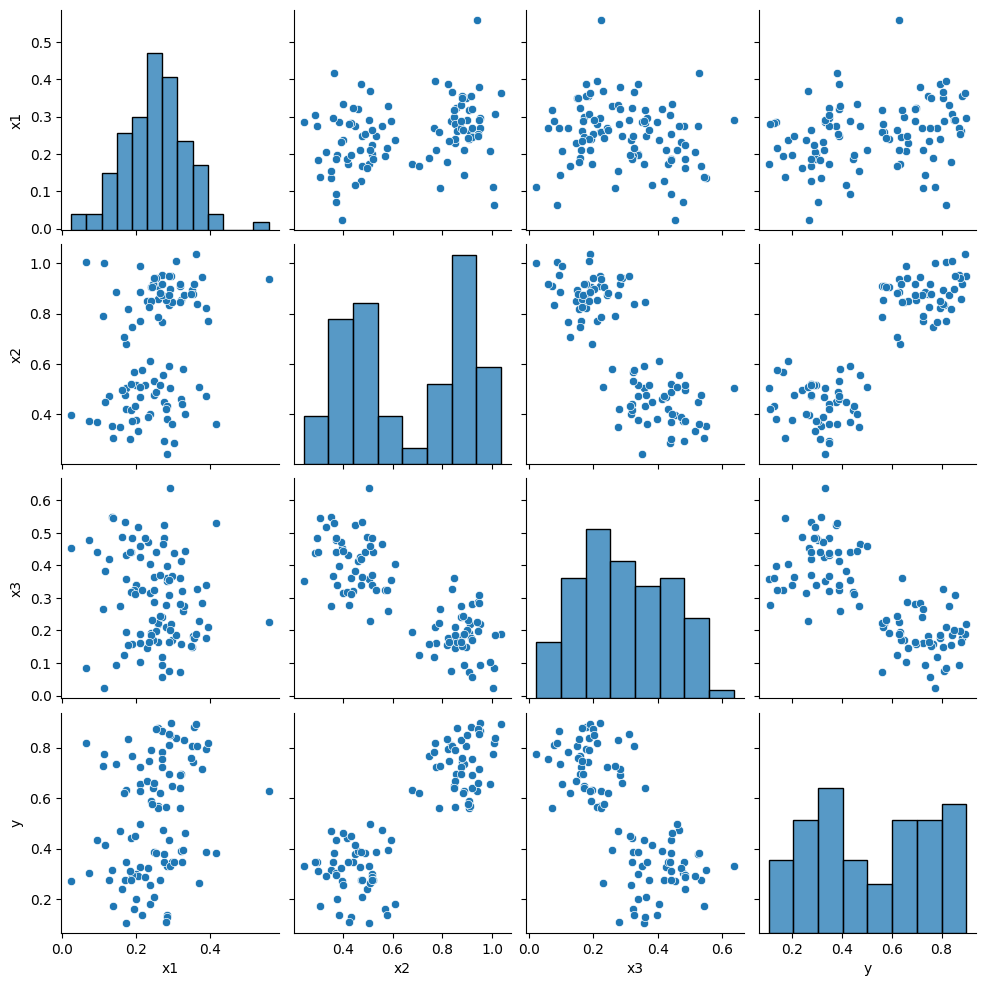

In [7]:
import seaborn as sns

sns.pairplot(df)
plt.show()


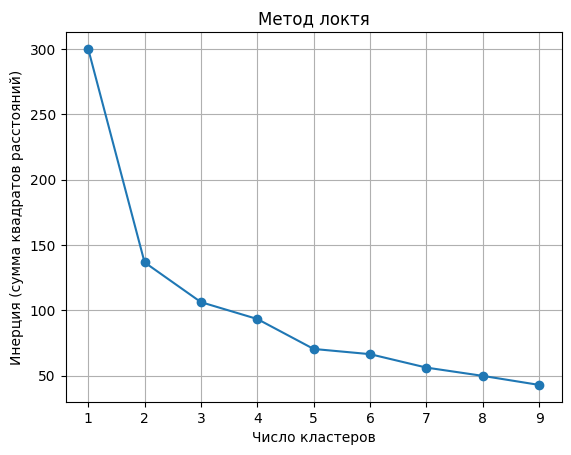

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

df = pd.read_csv("dataset_05.csv", sep=';')

X = df[['x1', 'x2', 'x3']]
X_scaled = StandardScaler().fit_transform(X)

inertias = []
ks = range(1, 10)

for k in ks:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

plt.plot(ks, inertias, marker='o')
plt.xlabel("Число кластеров")
plt.ylabel("Инерция (сумма квадратов расстояний)")
plt.title("Метод локтя")
plt.grid(True)
plt.show()


In [43]:
k = 4

kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
df['cluster'] = kmeans.fit_predict(X_scaled)


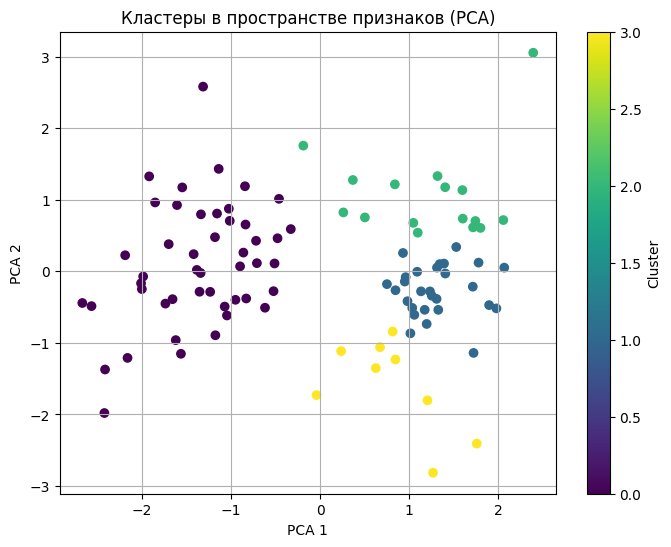

In [44]:
from sklearn.decomposition import PCA

X_scaled = StandardScaler().fit_transform(df[['x1', 'x2', 'x3']])
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['cluster'])
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('Кластеры в пространстве признаков (PCA)')
plt.colorbar(scatter, label='Cluster')
plt.grid(True)
plt.show()


In [45]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
import numpy as np

errors = []

for cluster_id in sorted(df['cluster'].unique()):
    cluster_data = df[df['cluster'] == cluster_id]
    X_cluster = cluster_data[['x1', 'x2', 'x3']]
    y_cluster = cluster_data['y']

    model = LinearRegression()
    scores = cross_val_score(
        model,
        X_cluster,
        y_cluster,
        cv=5,
        scoring='neg_max_error'
    )
    
    mean_error = abs(np.mean(scores))
    errors.append(mean_error)
    print(f"Cluster {cluster_id} | mean max_error: {mean_error:.4f}")

print("-----")
print("Средний max_error по кластерам:", np.mean(errors))


Cluster 0 | mean max_error: 0.1980
Cluster 1 | mean max_error: 0.1877
Cluster 2 | mean max_error: 0.2080
Cluster 3 | mean max_error: 0.0804
-----
Средний max_error по кластерам: 0.1685357770590627


In [18]:
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(df[['x1', 'x2', 'x3']], df['y'])
print(model.coef_, model.intercept_)


[ 0.12024067  0.72420134 -0.25536911] 0.09048333982932011
